In [20]:
import math, h5py, scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [21]:
train_data = h5py.File('train_happy.h5', "r")
train_data.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [22]:
test_data = h5py.File('test_happy.h5', "r")
test_data.keys()

<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>

In [23]:
train_data["train_set_x"]

<HDF5 dataset "train_set_x": shape (600, 64, 64, 3), type "|u1">

In [24]:
train_data["train_set_x"][:]

array([[[[178, 190, 163],
         [172, 181, 173],
         [188, 196, 184],
         ...,
         [255, 255, 254],
         [254, 255, 250],
         [249, 253, 222]],

        [[184, 201, 165],
         [149, 154, 142],
         [149, 158, 139],
         ...,
         [255, 255, 253],
         [254, 255, 250],
         [251, 255, 230]],

        [[198, 207, 165],
         [141, 147, 128],
         [168, 184, 154],
         ...,
         [253, 255, 244],
         [254, 255, 248],
         [253, 255, 233]],

        ...,

        [[ 77,  82,  89],
         [ 60,  64,  68],
         [ 49,  53,  55],
         ...,
         [ 31,  32,  30],
         [ 47,  48,  46],
         [ 75,  75,  75]],

        [[ 68,  71,  76],
         [ 55,  58,  59],
         [ 44,  47,  47],
         ...,
         [ 30,  31,  29],
         [ 40,  41,  39],
         [ 63,  64,  63]],

        [[ 61,  64,  66],
         [ 52,  54,  54],
         [ 45,  47,  46],
         ...,
         [ 30,  31,  29],
        

In [25]:
x_train = np.array(train_data["train_set_x"][:]) 
y_train = np.array(train_data["train_set_y"][:]) 

x_test = np.array(test_data["test_set_x"][:])
y_test = np.array(test_data["test_set_y"][:])

In [26]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

x_train:  (600, 64, 64, 3)
y_train:  (600,)
x_test:  (150, 64, 64, 3)
y_test:  (150,)


In [27]:
y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

In [28]:
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

y_train:  (1, 600)
y_test:  (1, 150)


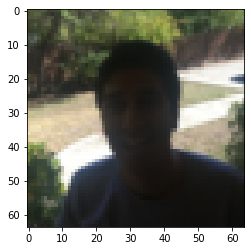

In [29]:
plt.imshow(x_train[2])

In [30]:
x_train = x_train/255. #normalizing the image vectors
x_test = x_test/255. #normalizing the image vectors
y_train = y_train.T
y_test = y_test.T

In [31]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

x_train:  (600, 64, 64, 3)
y_train:  (600, 1)
x_test:  (150, 64, 64, 3)
y_test:  (150, 1)


In [33]:
model = tf.keras.Sequential([
    tfl.ZeroPadding2D(padding=(3,3), input_shape=(64,64,3), data_format="channels_last"),
    tfl.Conv2D(filters=32,kernel_size=(7,7),strides=(1,1)),
    tfl.MaxPool2D(),
    tfl.Conv2D(filters=32,kernel_size=(7,7),strides=(1,1)),
    tfl.MaxPool2D(),
    tfl.BatchNormalization(axis=3),
    tfl.ReLU(),
    tfl.MaxPool2D(),
    tfl.Flatten(),
    tfl.Dense(units=1,activation='sigmoid')
    ])

In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        50208     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 13, 13, 32)       

In [36]:
model.fit(x_train,y_train,epochs=20,batch_size=16)

Epoch 1/20
38/38 [==============================] - 7s 157ms/step - loss: 0.6268 - accuracy: 0.6950
Epoch 2/20
38/38 [==============================] - 6s 149ms/step - loss: 0.3861 - accuracy: 0.8767
Epoch 3/20
38/38 [==============================] - 6s 151ms/step - loss: 0.2699 - accuracy: 0.9200
Epoch 4/20
38/38 [==============================] - 6s 151ms/step - loss: 0.2012 - accuracy: 0.9317
Epoch 5/20
38/38 [==============================] - 6s 151ms/step - loss: 0.1617 - accuracy: 0.9600
Epoch 6/20
38/38 [==============================] - 6s 152ms/step - loss: 0.1071 - accuracy: 0.9717
Epoch 7/20
38/38 [==============================] - 6s 151ms/step - loss: 0.0750 - accuracy: 0.9900
Epoch 8/20
38/38 [==============================] - 6s 153ms/step - loss: 0.0543 - accuracy: 0.9900
Epoch 9/20
38/38 [==============================] - 6s 152ms/step - loss: 0.0436 - accuracy: 0.9933
Epoch 10/20
38/38 [==============================] - 6s 150ms/step - loss: 0.0372 - accuracy: 0.9933

In [37]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 1s 63ms/step - loss: 0.0863 - accuracy: 0.9600


[0.0863405391573906, 0.9599999785423279]